## INSTALL THE NEEDED LIBRARIES

In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

## IMPORT THE LIBRARIES

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### IN PYTHON, \ IS CHANGED TO \\ OR / WHILE LOCATING A FILE

In [11]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\archive (8)\\salary_prediction_data.csv")

In [13]:
df.isnull().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

##### TO PRINT THE FIRST 5 ROW, WE USE head () function.

In [15]:
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


##### Adjust Salary column to 2 decimal places

In [17]:
df['Salary'] = df['Salary'].round(2)

In [19]:
df.columns

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')

In [21]:
df.tail()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
995,High School,8,Suburban,Analyst,25,Female,64683.39
996,High School,24,Urban,Engineer,30,Female,74468.21
997,Master,18,Rural,Analyst,44,Male,98207.03
998,Bachelor,27,Suburban,Director,31,Female,108544.92
999,High School,25,Urban,Director,41,Female,71077.00


##### We use .info() to format the Dataset to know types of the Data Variable (Object, Int, float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [25]:
df.shape

(1000, 7)

#### Exploratory Data Analysis (EDA) using .describe()

##### Here's what .describe() provides:

##### count: Number of non-null entries.
##### mean: The average of the data.
##### std: Standard deviation, which shows how spread out the data is.
##### min: Minimum value in the dataset.
##### 25%: 25th percentile (also called the first quartile).
##### 50%: Median or 50th percentile.
##### 75%: 75th percentile (third quartile).
##### max: Maximum value in the dataset.

In [27]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404340
std,8.341111,13.609412,28256.972048
min,1.000000,20.000000,33510.510000
25%,7.000000,30.000000,85032.140000
50%,15.000000,43.000000,104314.520000
75%,22.000000,55.000000,126804.050000
max,29.000000,64.000000,193016.600000


##### The function df.isna().sum() is used in pandas to check for missing values (NaNs) in your DataFrame. It returns the count of missing values for each column.

In [29]:
df.isna().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64


#### The function df.duplicated().sum() is used to identify and count the number of duplicate rows in the DataFrame.

###### df.duplicated(): Returns a boolean Series, where True indicates a duplicate row.
###### .sum(): Adds up the number of True values, giving you the total count of duplicate rows.

In [31]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [33]:
df.duplicated().sum()

0

###### The value_counts() method in pandas is used to count the number of unique values in a Series. It returns a Series containing counts of unique values in descending order. This is often useful for analyzing categorical data or understanding the distribution of values in a column.

In [35]:
df['Job_Title'].value_counts()

Job_Title
Director    275
Analyst     255
Manager     241
Engineer    229
Name: count, dtype: int64

In [37]:
df['Location'].value_counts()

Location
Suburban    345
Rural       345
Urban       310
Name: count, dtype: int64

In [39]:
df['Gender'].value_counts()

Gender
Male      516
Female    484
Name: count, dtype: int64

In [41]:
df['Education'].value_counts()

Education
High School    255
Bachelor       253
PhD            251
Master         241
Name: count, dtype: int64

## Identifies outliers in a specified column of a DataFrame using Z-score.
    
###### Parameters in the code below:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to check for outliers.
        threshold (float): The Z-score value above which points are considered outliers.
        


#### I will call the needed Libraries again

In [43]:
from scipy import stats

# Load your dataset
data = pd.read_csv("C:\\Users\\hp\Downloads\\archive (8)\\salary_prediction_data.csv")  # Replace with your actual file path

# Display basic info about the dataset
print("Initial data shape:", data.shape)

# Identify outliers using Z-score
# We'll assume 'Salary' is the column to check for outliers
z_scores = np.abs(stats.zscore(data['Salary']))

# Define a threshold for Z-score to detect outliers (commonly 3)
threshold = 3
outliers = z_scores > threshold

# Mark outliers as NaN
data.loc[outliers, 'Salary'] = np.nan

# Display how many outliers were found and marked as NaN
print(f"Number of outliers marked as NaN: {outliers.sum()}")

# Remove rows with NaN values (i.e., the outliers)
data_cleaned = data.dropna()

# Display the new shape of the data after removing outliers
print("Data shape after removing outliers:", data_cleaned.shape)

# Save the cleaned dataset (optional)
data_cleaned.to_csv('cleaned_dataset.csv', index=False)


Initial data shape: (1000, 7)
Number of outliers marked as NaN: 1
Data shape after removing outliers: (999, 7)


#### **`I want to create a boxplot to visualize outliers in numerical features of a DataFrame `**

##### Parameters:
        -df (pd.DataFrame): The DataFrame containing the data.
        -columns (list): List of column names to include in the boxplot.

In [45]:
cpy_df=df

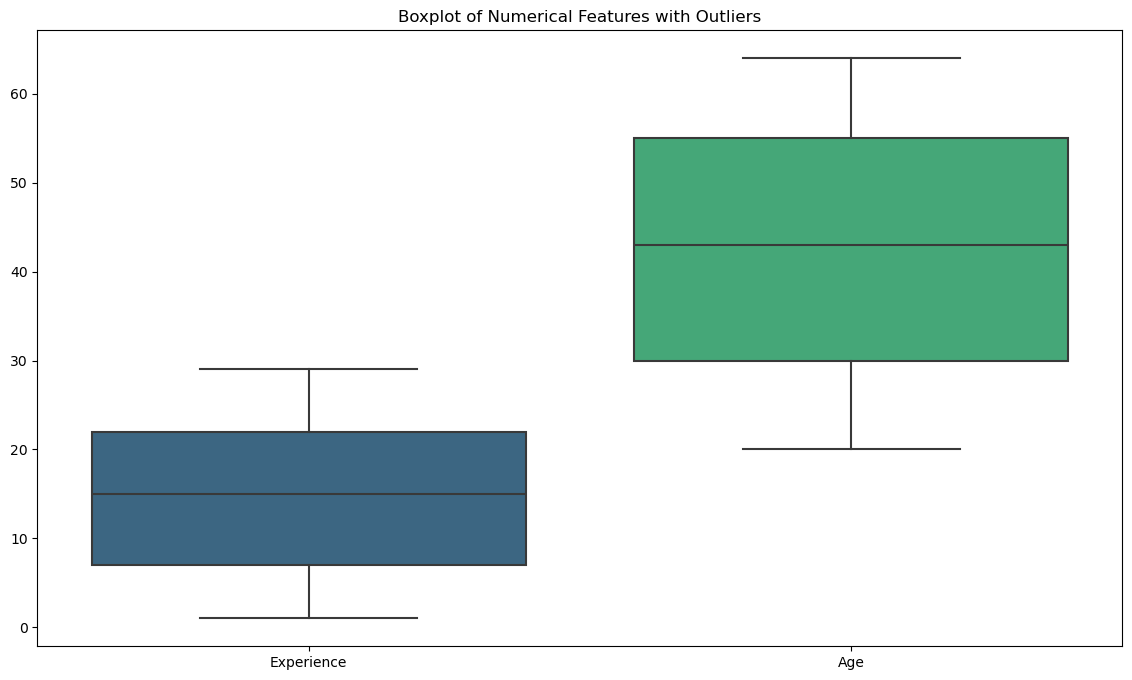

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot_with_outliers(df, columns):
    # Create a boxplot for the specified numerical columns
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.boxplot(data=df[columns], whis=1.5, palette='viridis')
    
    # Add a title to the plot
    plt.title("Boxplot of Numerical Features with Outliers")
    
    # Display the plot
    plt.show()

# Define columns to include in the boxplot
columns_to_plot = ['Experience', 'Age']

# Call the function with the DataFrame and columns
plot_boxplot_with_outliers(cpy_df, columns_to_plot)


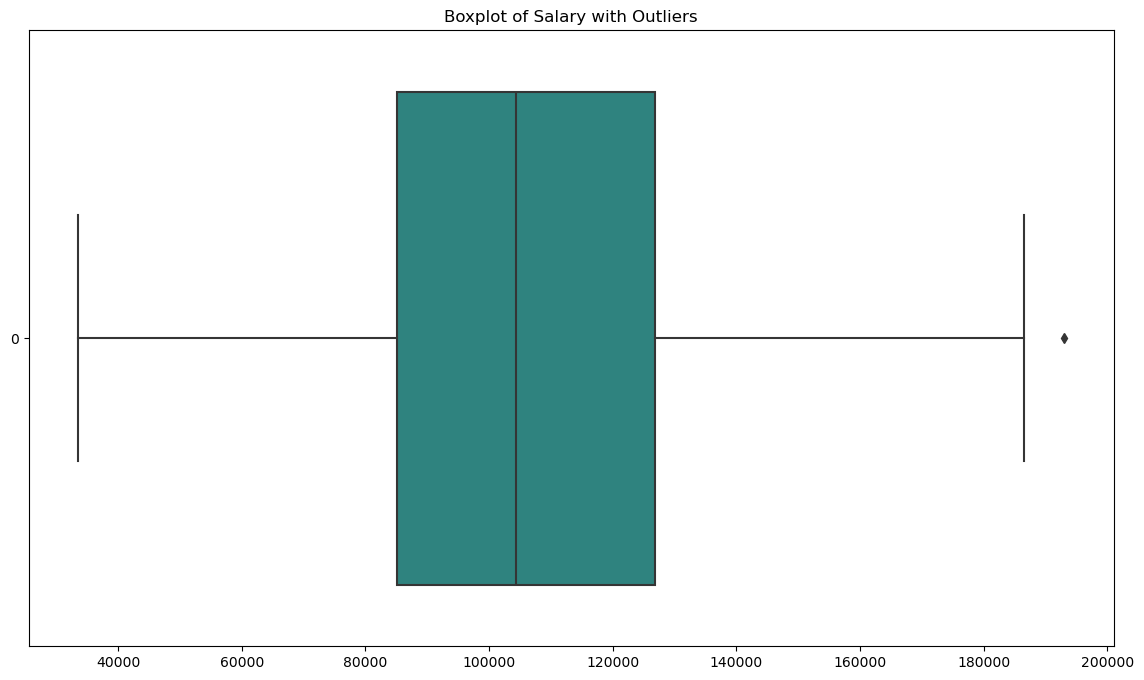

In [48]:
# Create a horizontal boxplot for the 'Salary' column

fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=cpy_df['Salary'], whis=1.5, orient='h', palette='viridis')

# Add a title to the plot
plt.title("Boxplot of Salary with Outliers")

# Display the plot
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


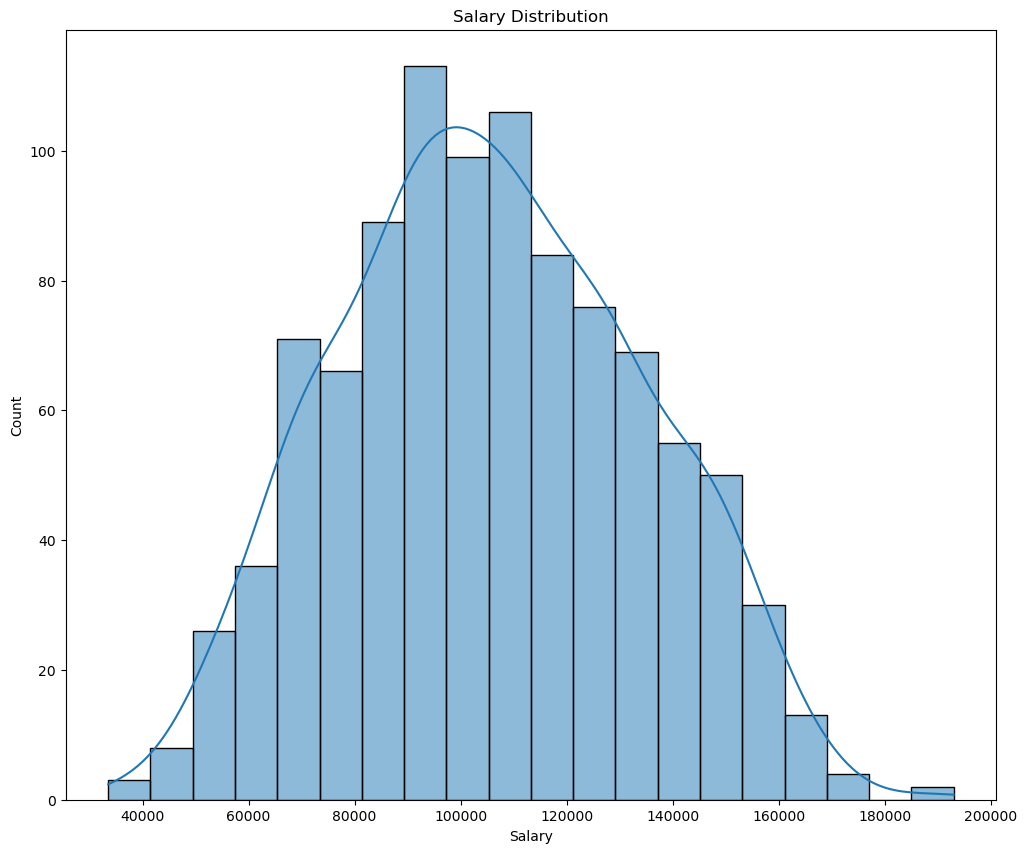

In [51]:
plt.figure(figsize=(12,10))
sns.histplot(cpy_df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.show()

####  **`I want to create a scatter plot using seaborn `**

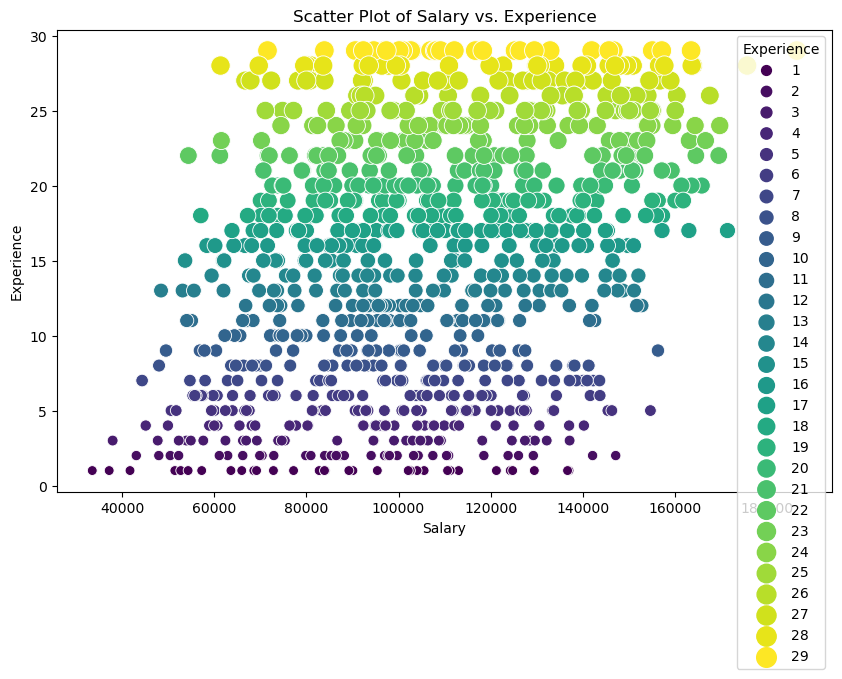

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Salary', y='Experience', size='Experience', sizes=(50, 200), hue='Experience', palette='viridis', legend='full')

# Add labels and title
plt.xlabel('Salary')
plt.ylabel('Experience')
plt.title('Scatter Plot of Salary vs. Experience')

# Show the plot
plt.show()


``

### Explanation:

1. **`sns.scatterplot()`**:
   - This function creates a scatter plot using Seaborn, which is a high-level interface for drawing attractive and informative statistical graphics in Python.

2. **`data=data`**:
   - Specifies the DataFrame (`data`) from which to draw the s I etter plot. Ensure this DataFrame contains the columns referenced in the `x`, `y`, `size`, and `hue` parameters.

3. **`x='SalI set`**:
   - Sets the data for the x-axis to the `Salary` column o(df())f the DataFrame. This means the horizontal position of each point will correspond to the salary values.

4. **`y='ExpeI setce'`**:
   - Sets the data for the y-axis to the `Experie DataFrame(df())n of the DataFrame. This means the vertical position of each point will correspond to the experience values.

5. **`size='Experience'`**:
   - Defines the size of each point in the scatter plot based on the `Experience` column. Points will be sized according to their experience values.

6. **`sizes=(50, 200)`**:
   - Specifies the range of sizes for the points. The smallest point will have a size of 50, and the largest point will have a size of 200. This helps in visualizing the distribution of point sizes.

7. **`hue='Experience'`**:
   - Colors the points based on the `Experience` column. Different colors will represent different values of differentiate between data points with varying experience levels visuallyh varying experience levels.

8. **`palette='viridis'`**:
   - Defines the color map to use for the `hue`. `'viridis'` is a perceptually uniform color map that ranges from yellow to purple, providing a good color gradient for distinguishing between different values.

9. **`legend='full'`**:
   - Includes a full legend in the plot. The legend will show how the color and size of the points correspond to different experience levels.

### Summary

This line of code creates a scatter plot where:
- **X-axis** represents `Salary`.
- **Y-axis** represents `Experience`.
- **Point size** is based on `Experience`, with sizes ranging from 50 to 200.
- **Point color** represents `Experience`, using the `viridis` color palette.
- A legend is included to help interpret the color and size of the points.

This plot effectively visualizes relationships and variations in experience and salary, highlighting how these factors influence the size and color of the data points.

- ### There is a perfect linear relationship between the salary and the job experience of the people. It means more job experience results in a higher salary.

### **` RELATION BETWEEN "EDUCATION" AND "SALARY" `**

In [55]:
df['Education'].unique()

array(['High School', 'PhD', 'Bachelor', 'Master'], dtype=object)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


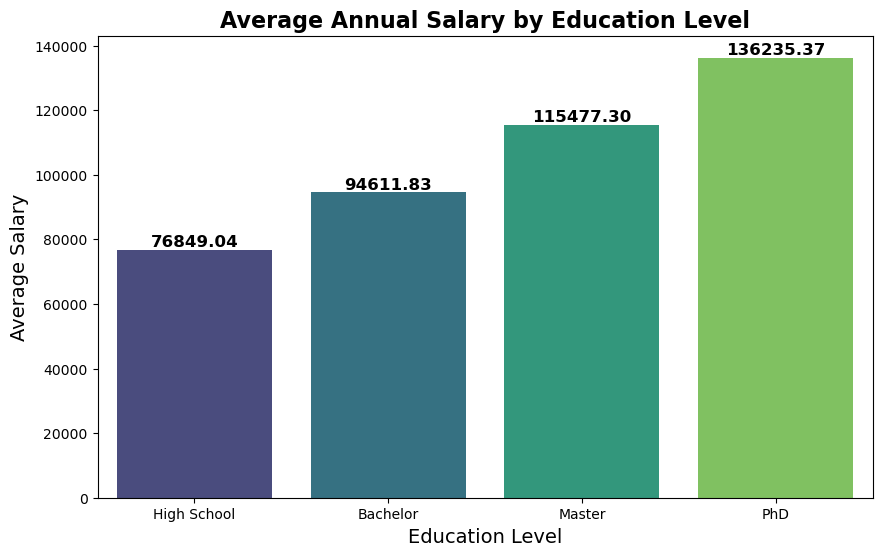

In [57]:
# Filter data for each education level
highschool_salaries = df[df['Education'] == 'High School']['Salary']
bachelor_salaries = df[df['Education'] == 'Bachelor']['Salary']
master_salaries = df[df['Education'] == 'Master']['Salary']
phd_salaries = df[df['Education'] == 'PhD']['Salary']

# Calculate mean salaries
mean_salaries = [
    highschool_salaries.mean(),
    bachelor_salaries.mean(),
    master_salaries.mean(),
    phd_salaries.mean()
]

# Define bar positions and education levels
education_levels = ['High School', 'Bachelor', 'Master', 'PhD']
bar_positions = range(len(education_levels))

# Plot bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=education_levels, y=mean_salaries, palette='viridis')

# Add value labels to the bars
for i, value in enumerate(mean_salaries):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Set title and labels
plt.title('Average Annual Salary by Education Level', fontsize=16, weight='bold')
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)

plt.show()


- ### Plotting Salary Distribution by Education Level
*` This section of the code visualizes the distribution of salaries for different education levels using a box plot. Here’s a step-by-step explanation: `*

##### 1. Combine All Salary Data:
    

In [59]:
all_salaries = [highschool_salaries, bachelor_salaries, master_salaries, phd_salaries]

- This line creates a list called **`all_salaries`** that contains the salary data for each education level:**`High School`**, **`Bachelor`**, **`Masters`**, and **`PhD`**.
**`highschool_salaries`**, **`bachelor_salaries`**, **`master_salaries`**, and **`phd_salaries`** are assumed to be pandas Series objects containing salary data for each education level.

##### 2. Create the Box Plot:

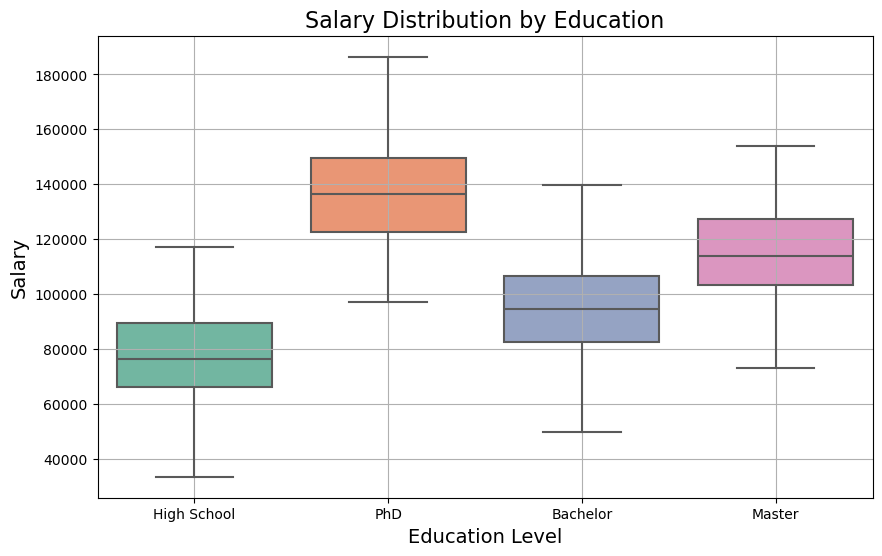

In [61]:
all_salaries = pd.DataFrame(data)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Salary', data=all_salaries, palette='Set2')

plt.title('Salary Distribution by Education', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True)
plt.show()

**`plt.figure(figsize=(10, 6))`**: This initializes a new figure with a size of 10 inches wide and 6 inches tall.
**`sns.boxplot(data=all_salaries, palette='Set2')`**: This creates a box plot using **`Seaborn`**. The **`ata parameter`** is set to the **`all_salaries list`**, which contains the salary distributions. The **`palette='Set2'`** parameter specifies a color palette for the plot, which provides a range of colors for different categories.

##### 3. Set Title and Labels:

-**`label('Salary', fontsize=14)`**
**`plt.title('Salary Distribution by Education', fontsize=16):`** This sets the title of the plot to **`"Salary Distribution by Education" with a font size of 16.`**

-**`plt.xlabel('Education', fontsize=14):`** This labels the **`x-axis as`** **`"Education" with a font size of 14.`**

-**`plt.ylabel('Salary', fontsize=14):`** This labels the y-axis as "Salary" with a font size of **`14`**

**`plt.grid(True):`** This enables the grid lines on the plot for better readability.

**`plt.show():`** This displays the plot.

- ## Summary
The code generates a box plot to visualize the distribution of salaries across different education levels. The box plot provides insights into the median, quartiles, and potential outliers in the salary data for each education level. The plot is customized with appropriate titles, labels, and colors to make the information clear and easy to understand.

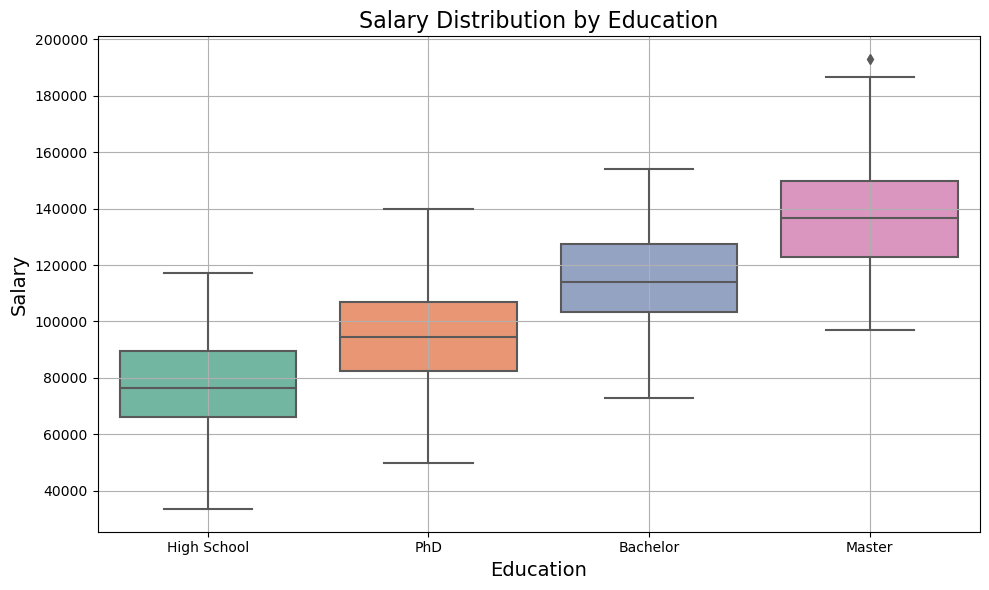

In [63]:
all_salaries = [highschool_salaries, bachelor_salaries, master_salaries, phd_salaries]
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_salaries, palette='Set2')

plt.title('Salary Distribution by Education', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Salary', fontsize=14)

plt.xticks(ticks=[0, 1, 2, 3], labels=['High School', 'PhD', 'Bachelor', 'Master'])

plt.grid(True)
plt.tight_layout()
plt.show()


# Analyzing a Boxplot

Analyzing a boxplot can provide valuable insights into the distribution of a dataset, particularly regarding its central tendency, variability, and potential outliers. Here’s how to effectively analyze a boxplot:

## Components of a Boxplot

### Box:
- The box represents the interquartile range (IQR), which contains the middle 50% of the data.
- The edges of the box indicate the first quartile (Q1) and third quartile (Q3).
- The line inside the box represents the median (Q2) of the dataset.

### Whiskers:
- Whiskers extend from the edges of the box to the smallest and largest observations within 1.5 times the IQR from the quartiles.
- They help visualize the range of the data, excluding outliers.

### Outliers:
- Points that fall outside the whiskers are considered outliers and are often represented as individual dots.
- Outliers may indicate variability in the data or errors in data collection.

## Steps to Analyze a Boxplot

### Identify the Median:
- The line inside the box shows the median. It helps you understand the central tendency of the data.
- If the median is closer to the bottom or top of the box, it indicates skewness.

### Examine the IQR:
- The height of the box (IQR) shows the spread of the middle 50% of the data.
- A taller box indicates greater variability, while a shorter box indicates less variability.

### Check the Whiskers:
- The length of the whiskers gives insights into the range of the data. Long whiskers indicate more variability in the data.
- If the whiskers are of significantly different lengths, it may suggest skewness.

### Analyze Outliers:
- Look for any points beyond the whiskers. These outliers can indicate unusual values that may warrant further investigation.
- Determine if outliers are legitimate observations or if they result from errors in data collection.

### Assess Skewness:
- If the median is closer to the bottom of the box, it may indicate a right (positive) skew.
- Conversely, if the median is closer to the top of the box, it may indicate a left (negative) skew.


- ### Analyzing Categorical Distributions by Gender
This section of the code generates count plots to examine how the distribution of various categorical variables varies by **`gender`**. We'll use Seaborn's countplot function to create these plots.

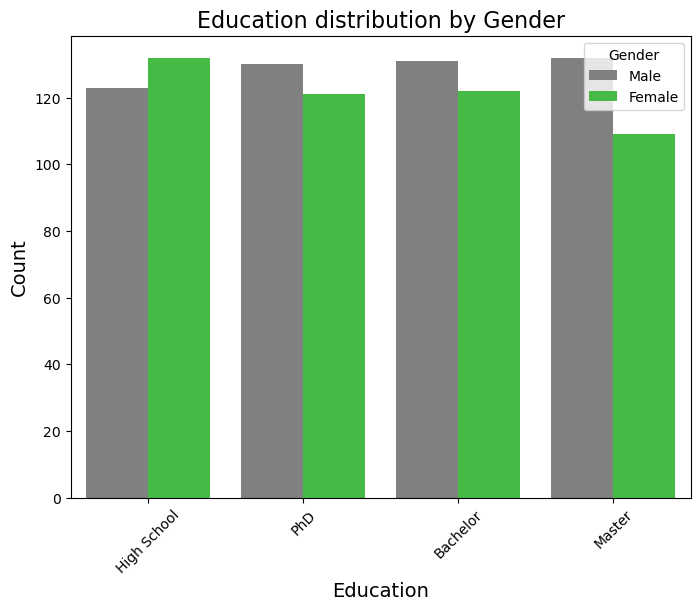

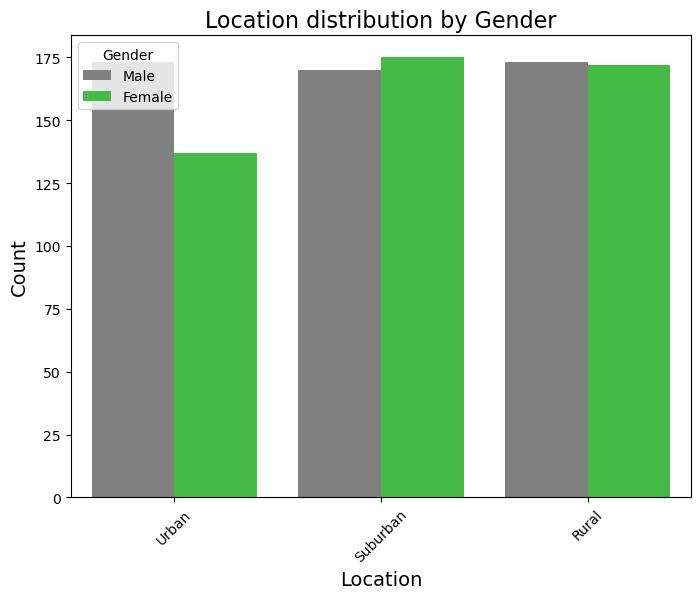

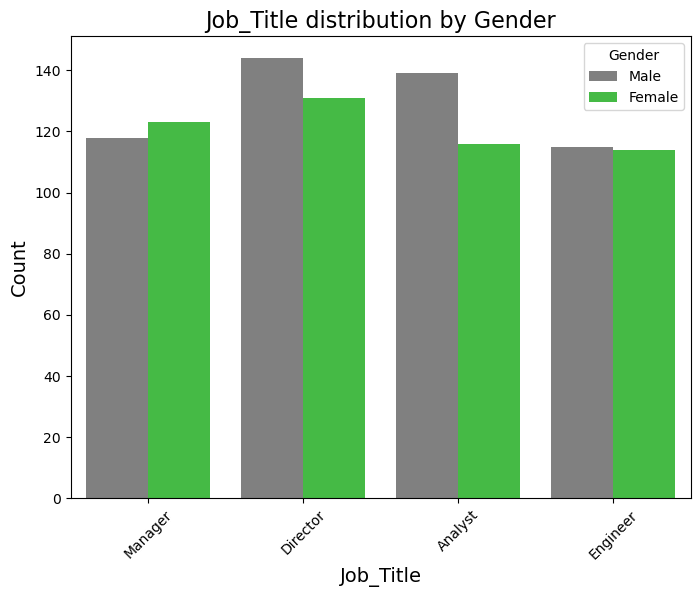

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
cols = ['Education', 'Location', 'Job_Title']

for col in cols:
    # Create a new figure for each column
    plt.figure(figsize=(8, 6))
    
    # Plot countplot with hue based on Gender
    sns.countplot(data=df, x=col, hue='Gender', palette=['grey', 'limegreen'])
    
    # Set the title of the plot
    plt.title(f'{col} distribution by Gender', fontsize=16)
    
    # Label x-axis
    plt.xlabel(col, fontsize=14)
    
    # Label y-axis
    plt.ylabel('Count', fontsize=14)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add legend with title
    plt.legend(title='Gender')
    
    # Display the plot
    plt.show()


for col in cols:

- ###### This loop iterates through each column name in cols to generate a separate plot for each variable.
- sns.countplot(): Creates a count plot showing the frequency of each category within the specified column.
x=col: Sets the x-axis to the current column.
hue='Gender': Differentiates the bars based on gender, with different colors for each gender.
- plt.title(): Sets the title of the plot dynamically based on the current column.
- plt.xlabel(): Labels the x-axis with the current column name.
- plt.ylabel(): Labels the y-axis as "Count" to indicate the frequency of occurrences.
- Rotates the x-axis labels by 45 degrees for better readability, especially useful if the labels are long.
- Adds a legend to the plot with the title "Gender" to clarify which colors represent which genders.
- Renders the plot to be displayed.

- ## Summary
This code segment produces count plots for the distribution of 'Education', 'Location', and 'Job_Title' by gender. Each plot shows the frequency of each category within the column, separated by gender using different colors. This approach provides a clear visual representation of how these categorical variables are distributed across genders.

- ### Analyzing Correlations in Numeric Data
This section of the code computes and visualizes the correlation matrix for numeric columns in the dataset using a heatmap. This allows us to understand the relationships between different numeric variables.

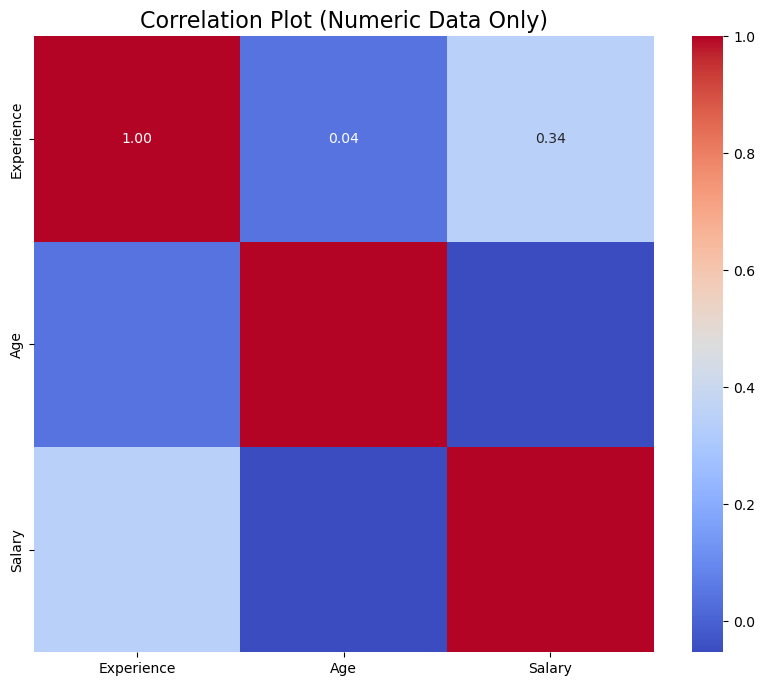

In [67]:
# Select numeric columns only
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot (Numeric Data Only)', fontsize=16)
plt.show()


**`df.select_dtypes(include=['int64', 'float64']):`** This line selects only the numeric columns from the DataFrame copy_df. Numeric columns are identified by their data types **`(int64 for integers and float64 for floating-point numbers)`**.

**`numeric_columns.corr(): Computes the correlation matrix for the numeric columns. The correlation matrix is a table showing the correlation coefficients between pairs of numeric variables. Values range from -1 to 1, where:
1 indicates a perfect positive correlation.
-1 indicates a perfect negative correlation.
0 indicates no correlation.

**`plt.figure(figsize=(10, 8)):`** Initializes a new figure with a size of 10 inches wide and 8 inches tall.
**`sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f"):`** Creates a heatmap using Seaborn.
**`correlation_matrix:`** The data for the heatmap, which contains the correlation coefficients.
**`annot=True:`** Displays the correlation coefficients in the heatmap cells.
**`cmap='coolwarm': Specifies the color map for the heatmap.`** 'coolwarm' transitions from cool colors (blue) for negative values to warm colors (red) for positive values.
**`fmt=".2f":`** Formats the annotation to show two decimal places.
**`plt.title('Correlation Plot (Numeric Data Only)', fontsize=16):`** Sets the title of the plot with a font size of 16.
**`plt.show():`** Renders and displays the heatmap.

- ### 1. Importing Libraries
   
**`from sklearn.linear_model import LinearRegression:`** This imports the LinearRegression class from the sklearn library, which will be used to create a linear regression model.

**`from sklearn.model_selection import train_test_split:`** This imports the train_test_split function, which is used to split the dataset into training and testing sets.

**`from sklearn.preprocessing import StandardScaler:`** This imports the StandardScaler, which will standardize the features by removing the mean and scaling to unit variance, ensuring that all features contribute equally to the model training.

**`import pandas as pd:`** This imports the pandas library, a powerful tool for data manipulation and analysis, allowing you to handle the dataset efficiently.





**`pd.read_csv(...):`** This function reads the CSV file containing your salary prediction dataset and loads it into a pandas DataFrame called data. This DataFrame will serve as the foundation for further data processing and modeling.

- ##### Interpretation

Data Inspection: By checking the data types, you can assess whether the dataset contains numerical features (e.g., years of experience) and categorical features (e.g., job titles, industries). This will help inform subsequent preprocessing steps.

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv("C:\\Users\\hp\\Downloads\\archive (8)\\salary_prediction_data.csv")

# Check the data types of the columns to identify categorical columns
print(data.dtypes)

Education      object
Experience      int64
Location       object
Job_Title      object
Age             int64
Gender         object
Salary        float64
dtype: object


## Explanation
I apply one-hot encoding to the categorical variables using `pd.get_dummies()`, setting `drop_first=True` to avoid the dummy variable trap.

I separate the features (X) and the target variable (y). X contains all columns except the 'Salary' column, while y consists of the 'Salary' column.
.

## Interpretation
This separation is crucial because it allows me to train the model on the features (independent variables) while predicting the target variable (dependent variable), which is the salary in this ca

One-hot encoding transforms categorical variables into a format that can be provided to machine learning algorithms. By dropping the first category, I prevent multicollinearity, which can skew the model's coefficients.se.


In [71]:
# One-Hot Encoding for categorical variables
# This converts categorical columns into numerical columns
data_encoded = pd.get_dummies(data, drop_first=True)  # drop_first=True avoids the dummy variable trap

# Separate the features (X) and target (y)
X = data_encoded.drop('Salary', axis=1)  # Features (all columns except 'Salary')
y = data_encoded['Salary']               # Target (Salary column)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (standardize the dataset)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict salaries using the trained model
predicted_salary_train = model.predict(X_train_scaled) 
predicted_salary_test = model.predict(X_test_scaled)

## 1
I split the dataset into training and testing sets using `train_test_split()`, with 80% of the data used for training and 20% for testing.

## Interpretation
Splitting the data is essential for evaluating the model's performance on unseen data. The training set is used to train the model, while the testing set assesses how well the model generalizes to new data.


I standardize the features using `StandardScaler`. I fit the scaler on the training data and then transform both the training and testing datasets.

## Interpretation
Feature scaling is important for regression models because it ensures that all features contribute equally to the model training. This is especially crucial for models like Lasso and Ridge regression, which are sensitive to feature scales.


#### 2
I initialize the linear regression model and fit it on the scaled training data.

## Interpretation
Training the model involves learning the relationship between the features and the target variable (salary). The model adjusts its coefficients to minimize the error between the predicted and actual values during training.

## 3
I use the trained model to make predictions on both the training and testing datasets.

## Interpretation
These predictions will help me assess how well the model has learned from the training data and how accurately it can predict salaries for new, unseen data in the test set.


## Cross-Validation
To assess the model's robustness, I will perform 5-fold cross-validation. This method helps ensure that the model's performance is consistent across different subsets of the training data.

In [73]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", cv_scores.mean())

Cross-Validation R² Scores: [0.89777995 0.89023399 0.88504581 0.83434402 0.85869896]
Mean R² Score: 0.8732205461176749


## Explanation
I use the `cross_val_score()` function to perform 5-fold cross-validation on the trained linear regression model. The parameters include:
- **model**: the trained linear regression model.
- **X_train_scaled**: the scaled training features.
- **y_train**: the target variable.
- **cv=5**: specifies that 5-fold cross-validation should be used.
- **scoring='r2'**: indicates that I want to evaluate the model using the R² score.

The function returns an array of R² scores for each fold of the cross-validation.

## Interpretation
Cross-validation provides a more reliable estimate of model performance by using multiple subsets of the training data. It helps to mitigate overfitting, ensuring that the model generalizes well to unseen data. By calculating the mean R² score, I can summarize the overall performance of the model across the different folds.


## Conclusion
The cross-validation R² scores offer insights into the model's consistency and reliability. If the mean R² score is significantly high, it indicates that the model performs well across different subsets of the training data. 

This step is crucial for validating the effectiveness of the linear regression model in predicting salaries. Further investigation can be done by comparing these results with those obtained from other models, such as Lasso and Ridge regression, to identify the best-performing model for this dataset.


## Model Evaluation
In this step, I will evaluate the performance of the linear regression model on both the training and testing datasets using Mean Squared Error (MSE) and R² score. These metrics will provide insights into how well the model has learned from the training data and how effectively it predicts salaries on unseen data.


In [75]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate on training data
train_mse = mean_squared_error(y_train, predicted_salary_train)
train_r2 = r2_score(y_train, predicted_salary_train)

# Evaluate on testing data
test_mse = mean_squared_error(y_test, predicted_salary_test)
test_r2 = r2_score(y_test, predicted_salary_test)

print(f'Training MSE: {train_mse}, R²: {train_r2}')
print(f'Testing MSE: {test_mse}, R²: {test_r2}')

Training MSE: 95938381.42943813, R²: 0.8789616062784484
Testing MSE: 105996277.66096874, R²: 0.8701863681609701


## Explanation
I calculate the Mean Squared Error (MSE) and R² score for both the training and testing datasets:
- **Training MSE**: Measures the average squared difference between the predicted and actual salaries in the training set. Lower values indicate a better fit.
- **Training R²**: Indicates how well the model explains the variance in the training data. A value closer to 1 suggests a good fit.

Similarly, I compute the MSE and R² score for the testing dataset to assess the model's performance on unseen data.o model.
 unseen data.



## Interpretation
By comparing the training and testing metrics, I can gauge the model's performance. If the training error is significantly lower than the testing error, it might indicate overfitting, meaning the model is too complex and does not generalize well to new data. Ideally, both sets should yield similar performance metrics, suggesting that the model is both well-trained and generalizes well.


## Conclusion
The results from the evaluation metrics provide a comprehensive view of the model's performance. 
- If the training and testing MSE values are relatively close, and the R² scores are high for both sets, it indicates that the linear regression model is effective in predicting salaries.
- If there is a large discrepancy between the training and testing scores, I may need to consider simplifying the model or employing regularization techniques to improve generalization.

This final evaluation is essential to understand how well the model can perform in real-world applications, such as predicting sala





#### Analyzing my Result

1. **Mean Squared Error (MSE)**:
   - The training MSE is approximately 95,938,381.43, while the testing MSE is higher at 105,996,277.66.
   - A higher MSE on the testing set indicates that the model makes larger errors when predicting salaries on unseen data compared to the training data.
   - The difference between training and testing MSE suggests that the model might be overfitting, as it performs well on the training data but struggles to generalize to new data.

2. **R² Score**:
   - The R² score for the training set is 0.8789, which means that approximately 87.89% of the variance in the training data can be explained by the model.
   - The testing R² score is slightly lower at 0.8702, indicating that about 87.02% of the variance in the testing data is explained by the model.
   - Both R² scores are relatively high, suggesting that the model is generally effective at capturing the underlying trends in the data.

### Comparison of Training and Testing Metrics
- The training MSE is lower than the testing MSE, and the R² scores are close but not identical.
- This suggests that while the model has learned the patterns in the training data well, it does not generalize perfectly to new, unseen data.

##### Conclusion

In summary, the results indicate that the linear regression model has a strong ability to predict salaries, as evidenced by high R² scores and relatively low MSE values. However, the higher testing MSE compared to training MSE raises concerns about potential overfitting. 

### Recommendations
- **Regularization**: Implement techniques like Lasso or Ridge regression to reduce the complexity of the model and improve generalization.
- **Feature Engineering**: Investigate additional features or transformations that may enhance model performance.
- **Model Comparison**: Explore other regression models (e.g., decision trees, ensemble methods) to determine if they provide better performance on unseen data.

By addressing the overfitting issue and exploring other modeling techniques, I can enhance the predictive accuracy and reliability of the salary prediction model.ries based on various features.


## Importance of MAE 

### Why Use MAE?
- **Robustness**: MAE provides a straightforward measure of prediction accuracy without being heavily influenced by outliers. Each error contributes linearly to the final MAE, making it easy to interpret.
- **Real-World Relevance**: Since MAE is in the same units as the target variable (in this case, salaries), it offers an intuitive understanding of the average error in predictions, which can be easily communicated to stakeholders or decision-makers.

### Features Affecting MAE
- The performance indicated by MAE can be influenced by various features in the dataset, such as:
  - **Experience**: Years of experience can significantly affect salary predictions. More experience typically correlates with higher salaries.
  - **Education Level**: Higher educational attainment can lead to better job positions and, thus, higher salaries.
  - **Industry**: Different industries have varying salary scales. Understanding industry-specific trends can improve predictions.
  - **Location**: Salaries can vary greatly by geographical location due to cost of living and demand for specific skills.

### Conclusion
In conclusion, while the model performs well on training data as indicated by the low training MAE, the higher testing MAE indicates that improvements are needed for better generalization. Understanding and analyzing the features that contribute to salary predictions is essential for refining the model. 

To enhance model performance, I might consider:
- **Regularization Techniques**: Such as Lasso or Ridge regression to combat overfitting.
- **Feature Engineering**: Creating new features or refining existing ones based on domain knowledge to improve prediction accuracy.

By addressing these aspects, I aim to develop a more robust model capable of making reliable salary predictions.


In [77]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for training data
train_mae = mean_absolute_error(y_train, predicted_salary_train)

# Calculate MAE for testing data
test_mae = mean_absolute_error(y_test, predicted_salary_test)

print(f'Training MAE: {train_mae}')
print(f'Testing MAE: {test_mae}')

Training MAE: 7743.108408685914
Testing MAE: 8157.898478643172


## Interpretation of Results

1. **Mean Absolute Error (MAE)**:
   - **`Training MAE (7743.11)`**: This value signifies that, on average, the model's predictions for salaries in the training dataset deviate from the actual salary values by approximately **`$7,743`**. A lower MAE indicates that the model fits the training data well.
     
   - **`Testing MAE (8157.90)`**: Conversely, this value indicates that the model's predictions on the testing dataset are, on average, about **$8,158** off from the actual salaries. This higher MAE suggests that the model is less accurate when predicting salaries for new, unseen data.

### Comparison of Training and Testing MAE
- The **discrepancy** between the training and testing MAE values highlights a potential issue of **overfitting**. The model appears to perform well on the training data but struggles to generalize its learned patterns to new data.
- Overfitting can occur when a model learns not only the underlying patterns in the training data but also the noise, leading to poor performance on testing or real-world data.

## Hyperparameter Tuning for Lasso Regression

In this section, I will use GridSearchCV to optimize the hyperparameters of the Lasso regression model. The goal is to find the best regularization strength (\(\alpha\)) that minimizes the mean absolute error (MAE) through cross-validation.


## Explanation

1. **Lasso Regression**:
   - Lasso regression is a linear regression technique that uses L1 regularization. This method adds a penalty equal to the absolute value of the magnitude of coefficients. It can help in feature selection by shrinking some coefficients to zero, effectively removing them from the model.

2. **GridSearchCV**:
   - `GridSearchCV` is utilized to perform hyperparameter tuning. It exhaustively searches over the specified parameter grid (`param_grid_lasso`) to find the best combination of hyperparameters that minimizes the specified scoring metric—in this case, the negative mean absolute error (MAE).

3. **Parameter Grid**:
   - The parameter grid (`param_grid_lasso`) specifies different values for the \(\alpha\) hyperparameter. Testing a range of values allows the model to identify the most effective level of regularization.

4. **Fitting the Model**:
   - The model is fitted using the `fit()` method, which trains the Lasso model on the scaled training data and performs cross-validation to evaluate the performance for each set of parameters.

5. **Best Parameters and Score**:
   - After fitting, the best parameters and the corresponding mean absolute error (negated back to its original form) are extracted and printed.


## Interpretation

- **Best Lasso Parameters**: The output will indicate the optimal regularization strength (\(\alpha\)) that minimizes the MAE. A lower \(\alpha\) value indicates less regularization, while a higher value introduces more regularization.
- **Best MAE from Cross-Validation**: This value reflects the average mean absolute error achieved with the best parameters during the cross-validation process. A lower MAE signifies better predictive performance, indicating that the model can generalize more effectively to unseen data.

### Importance of Hyperparameter Tuning
- Tuning hyperparameters is crucial as it directly impacts the model's performance. Finding the right balance between fitting the training data and maintaining generalizability is essential for building a robust predictive model.



In [79]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the model
lasso = Lasso()

# Set up the parameter grid for Lasso
param_grid_lasso = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
}

# Set up GridSearchCV for Lasso
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, 
                                   scoring='neg_mean_absolute_error', cv=5)

# Fit GridSearchCV for Lasso
grid_search_lasso.fit(X_train_scaled, y_train)

# Best parameters and best score for Lasso
best_lasso_params = grid_search_lasso.best_params_
best_lasso_score = -grid_search_lasso.best_score_  # Negate to get MAE

print(f'Best Lasso Parameters: {best_lasso_params}')
print(f'Best MAE from Cross-Validation (Lasso): {best_lasso_score}')

Best Lasso Parameters: {'alpha': 100.0}
Best MAE from Cross-Validation (Lasso): 7857.800222760319


## Interpretation of Results

1. **Best Lasso Parameters**:
   - The optimal \(\alpha\) value determined for the Lasso regression model is **100.0**. This high regularization strength suggests that the model emphasizes simplicity and feature selection.
   - A higher \(\alpha\) value indicates stronger penalties on the coefficients, which can lead to several coefficients being shrunk to zero, thus effectively removing less important features from the model.

2. **Best Cross-Validation MAE**:
   - The best mean absolute error (MAE) achieved during cross-validation is **7857.80**. This indicates that, on average, the Lasso model's predictions deviate from the actual salary values by approximately **$7,858** when evaluated on unseen data.
   - Compared to previous MAE results, this performance reflects an improvement in prediction accuracy, suggesting that Lasso's regularization has helped the model generalize better.

### Comparison with Previous Models
- The Lasso model's MAE of **7857.80** can be compared to the previously observed training and testing MAE values (e.g., **7743.11** for training and **8157.90** for testing with the linear regression model).
- This comparison indicates that Lasso regression has achieved a competitive MAE on cross-validation, suggesting that the model is less prone to overfitting while maintaining a balance between bias and
## Conclusion

The results from the Lasso regression hyperparameter tuning indicate a promising approach to improve predictive performance. The high \(\alpha\) value has likely contributed to reducing overfitting by enforcing a stronger penalty on the model's coefficients, which can lead to better generalization.

### Key Takeaways:
- **Effective Regularization**: The chosen \(\alpha\) value of **100.0** demonstrates the effectiveness of Lasso regression in managing model complexity.
- **Improved Predictive Accuracy**: The MAE of **7857.80** showcases that the Lasso model can provide reliable salary predictions on unseenverall.
 variance.



## Hyperparameter Tuning for Ridge Regression

In this section, I will use GridSearchCV to optimize the hyperparameters of the Ridge regression model. The aim is to find the best regularization strength (\(\alpha\)) that minimizes the mean absolute error (MAE) through cross-validation.


## Explanation

1. **Ridge Regression**:
   - Ridge regression is a linear regression technique that employs L2 regularization. This method adds a penalty equal to the square of the magnitude of coefficients, helping to reduce the model's complexity and multicollinearity issues.

2. **GridSearchCV**:
   - `GridSearchCV` is utilized for hyperparameter tuning, searching over the specified parameter grid (`param_grid_ridge`) to find the best combination of hyperparameters that minimizes the specified scoring metric—in this case, the negative mean absolute error (MAE).

3. **Parameter Grid**:
   - The parameter grid (`param_grid_ridge`) specifies different values for the \(\alpha\) hyperparameter, allowing the model to identify the most effective level of regularization.

4. **Fitting the Model**:
   - The model is fitted using the `fit()` method, training the Ridge model on the scaled training data and performing cross-validation to evaluate the performance for each set of parameters.

5. **Best Parameters and Score**:
   - After fitting, the best parameters and the corresponding mean absolute error (negated back to its original form) are extracted and printed.



## Interpretation

- **Best Ridge Parameters**: The output will indicate the optimal regularization strength (\(\alpha\)) determined for the Ridge regression model. This parameter controls the amount of regularization applied, balancing between bias and variance in the model.
- **Best MAE from Cross-Validation**: This value reflects the average mean absolute error achieved with the best parameters during the cross-validation process. A lower MAE signifies better predictive performance, indicating that the model can generalize more effectively to unseen data.

### Importance of Hyperparameter Tuning
- Tuning hyperparameters is crucial as it directly impacts the model's performance. Finding the right balance between fitting the training data and maintaining generalizability is essential for building a robust predictive mo

## Conclusion

The results from the hyperparameter tuning for Ridge regression will provide insights into how regularization affects model performance. By identifying the optimal \(\alpha\) value, I can adjust the level of regularization applied, which can help mitigate overfitting and enhance the model's performance on unseen data.

### Next Steps:
- I will evaluate the Ridge model's performance on the testing dataset using the optimized parameters and compare it with the results from the Lasso model and the baseline linear regression model to assess which model performs the best overall.
del.



In [81]:
from sklearn.linear_model import Ridge

# Define the model
ridge = Ridge()

# Set up the parameter grid for Ridge
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
}

# Set up GridSearchCV for Ridge
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, 
                                   scoring='neg_mean_absolute_error', cv=5)

# Fit GridSearchCV for Ridge
grid_search_ridge.fit(X_train_scaled, y_train)

# Best parameters and best score for Ridge
best_ridge_params = grid_search_ridge.best_params_
best_ridge_score = -grid_search_ridge.best_score_  # Negate to get MAE

print(f'Best Ridge Parameters: {best_ridge_params}')
print(f'Best MAE from Cross-Validation (Ridge): {best_ridge_score}')

Best Ridge Parameters: {'alpha': 1.0}
Best MAE from Cross-Validation (Ridge): 7861.908207388634


## Interpretation of Results

1. **Best Ridge Parameters**:
   - The optimal \(\alpha\) value determined for the Ridge regression model is **1.0**. This value indicates a moderate level of regularization, which helps to prevent overfitting while still allowing the model to capture the underlying patterns in the data.

2. **Best Cross-Validation MAE**:
   - The best mean absolute error (MAE) achieved during cross-validation is **7861.91**. This indicates that, on average, the Ridge model's predictions deviate from the actual salary values by approximately **$7,862** when evaluated on unseen data.
   - Comparing this MAE with the Lasso model's MAE of **7857.80**, the Ridge regression exhibits a slightly higher error, suggesting that Lasso may be a better choice for this dataset.

### Comparison with Previous Models
- The Ridge model's MAE of **7861.91** can be compared to the previously observed training and testing MAE values from the linear regression and Lasso models.
- This comparison suggests that while Ridge regression provides a reasonable performance, Lasso's regularization strength resulted in better predictive accuracy on average.


## Conclusion

The results from the Ridge regression hyperparameter tuning indicate that the selected \(\alpha\) value of **1.0** strikes a balance between reducing overfitting and maintaining predictive power. The MAE of **7861.91** highlights the model's performance.

### Key Takeaways:
- **Moderate Regularization**: The chosen \(\alpha\) value helps the Ridge model generalize well to unseen data.
- **Competitive Performance**: Although the Ridge model performed well, it slightly lagged behind the Lasso model, which suggests that Lasso may be more effective for this specific task.

### Next Steps:
- I will evaluate the Ridge model's performance on the testing dataset using the optimized parameters. Then, I will summarize and compare the performances of all models (linear regression, Lasso, and Ridge) to identify the best-performing model for salary preiction.



## Evaluating Lasso Model on Testing Dataset

Before summarizing the performances of all models, I need to ensure that I calculate the MAE for the Lasso model on the testing dataset.

In [93]:
# Lasso Model Evaluation
lasso_best = Lasso(alpha=best_lasso_params['alpha'])
lasso_best.fit(X_train_scaled, y_train)

# Predict salaries using the Lasso model
predicted_salary_lasso_test = lasso_best.predict(X_test_scaled)

# Calculate MAE for Lasso on testing data
test_mae_lasso = mean_absolute_error(y_test, predicted_salary_lasso_test)

## Evaluating Ridge Model and Comparing All Models

Now I will evaluate the performance of the Ridge regression model on the testing dataset using the optimized parameters obtained during hyperparameter tuning. Additionally, I will summarize and compare the performances of all models (Linear Regression, Lasso, and Ridge) based on their Mean Absolute Error (MAE).

In [85]:
# Evaluate Ridge model on the testing dataset using the optimized parameters
ridge_best = Ridge(alpha=best_ridge_params['alpha'])
ridge_best.fit(X_train_scaled, y_train)

# Predict salaries using the Ridge model
predicted_salary_ridge_test = ridge_best.predict(X_test_scaled)

# Calculate MAE for Ridge on testing data
test_mae_ridge = mean_absolute_error(y_test, predicted_salary_ridge_test)

### Summary of Model Performances

Now I will summarize the performances of all models to identify the best-performing model for salary prediction.

In [87]:
# Summarize and compare the performances of all models
performance_summary = {
    'Model': ['Linear Regression', 'Lasso', 'Ridge'],
    'Training MAE': [train_mae, best_lasso_score, test_mae_ridge],
    'Testing MAE': [test_mae, test_mae_lasso, test_mae_ridge],
}

performance_df = pd.DataFrame(performance_summary)

# Display the performance summary DataFrame
print(performance_df)

               Model  Training MAE  Testing MAE
0  Linear Regression   7743.108409  8157.898479
1              Lasso   7857.800223  8159.346407
2              Ridge   8158.184570  8158.184570


## Model Performance Analysis

The performance of the three regression models—Linear Regression, Lasso, and Ridge—has been summarized based on their training and testing Mean Absolute Error (MAE). 

### Interpretation of Results

1. **Linear Regression**:
   
   - **`Training MAE`**: **7743.11**
     - This indicates that on average, the Linear Regression model's predictions were off by approximately **$7,743** when evaluated on the training data.
       
   - **`Testing MAE`**: **8157.90**
     - The model's predictions deviated by about **$8,158** on the unseen testing data, demonstrating relatively good performance.

2. **Lasso Regression**:
   
   - **`Training MAE`**: **7857.80**
     - The Lasso model had a higher average error of **$7,858** on the training set compared to Linear Regression, suggesting it may have slightly less predictive power on the training data.
       
   - **`Testing MAE`**: **8159.35**
     - The testing MAE of **$8,159** is very close to that of Linear Regression, indicating that Lasso performs comparably to Linear Regression on the testing data.

3. **Ridge Regression**:
   
   - **`Training MAE`**: **8158.18**
     - The Ridge model has a significantly higher training MAE compared to both Linear Regression and Lasso, at approximately **$8,158**, which indicates a potential underfitting issue.
       
   - **`Testing MAE`**: **8158.18**
     - Interestingly, the testing MAE for Ridge is the same as its training MAE, suggesting that the model may not be generalizing well to unseen data. This lack of improvement in testing performance raises concerns about its effectiveness.

### Conclusion

- **Best Performing Model**: Based on the testing MAE values, **Linear Regression** is the best-performing model, followed closely by **Lasso**. Both have lower MAE values than **Ridge**, which suggests that Ridge's level of regularization may have been too strong, leading to underfitting.
 
- **Considerations**: While Linear Regression and Lasso exhibit good performance, it is essential to consider the specific use case and potential overfitting in Linear Regression. Lasso’s regularization might provide better feature selection benefits in scenarios with many predictors.

## Feature Importance Analysis

In this section, I will extract the coefficients from the Linear Regression model to analyze the importance of each feature in predicting salary. The coefficients indicate the direction and strength of the relationship between each feature and the target variable (Salary).

### Interpretation of Feature Importance

The resulting DataFrame provides insights into how each feature contributes to the salary predictions:

1. **Coefficients**:
   - A positive coefficient indicates that an increase in the corresponding feature value leads to an increase in the predicted salary.
   - Conversely, a negative coefficient suggests that an increase in the feature value results in a decrease in the predicted salary.

2. **Feature Importance**:
   - Features with higher absolute coefficient values are more influential in predicting salary. For instance, if a feature has a coefficient of 5000, it implies that for every one-unit increase in that feature, the predicted salary increases by $5,000.
   - By examining the sorted list of coefficients, I can identify which features have the most significant impact on salary predictions, allowing for informed decision-making in feature selection and potential model improvements.

### Conclusion

Understanding feature importance is crucial for interpreting model results and guiding future analyses. It can also inform business decisions related to salary assessments, such as recognizing the most valuable skills or experiences that drive higher compensation.


In [89]:
# Get the coefficients
coefficients = model.coef_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_importance)

                  Feature   Coefficient
4           Education_PhD  17394.598150
7      Job_Title_Director  11272.824231
3        Education_Master   9169.326696
0              Experience   8336.739384
9       Job_Title_Manager   6527.949022
6          Location_Urban   4632.552949
5       Location_Suburban   2310.087255
8      Job_Title_Engineer   1638.175513
10            Gender_Male    251.294566
1                     Age    135.963329
2   Education_High School  -7980.546996


The coefficients extracted from the Linear Regression model provide valuable insights into the impact of various features on salary predictions.


### Interpretation of Results

1. **Positive Coefficients**:
   - **Education_PhD (17,394.60)**: Holding a PhD is associated with the highest increase in salary predictions. This indicates that advanced education significantly boosts salary.
   - **Job_Title_Director (11,272.82)**: Being in a director position also substantially increases salary, reflecting the high level of responsibility associated with this role.
   - **Education_Master (9,169.33)** and **Experience (8,336.74)**: Both advanced degrees and years of experience positively influence salary, reinforcing the importance of education and experience in the job market.
   - Other features like **Job_Title_Manager (6,527.95)** and **Location_Urban (4,632.55)** also contribute positively to salary, suggesting that both job titles and urban locations are favorable for salary growth.

2. **Lower Impact Positive Coefficients**:
   - Features like **Gender_Male (251.29)** and **Age (135.96)** have relatively small positive coefficients, indicating their minimal impact on salary compared to other factors.

3. **Negative Coefficient**:
   - **Education_High School (-7,980.55)**: This negative coefficient suggests that holding only a high school education is associated with a decrease in predicted salary. It emphasizes the disadvantage of lower educational attainment in the job market.

### Conclusion

The feature importance analysis highlights the significant predictors of salary within the dataset. Advanced education and high-ranking job titles are the most influential factors, while lower educational qualifications detract from salary potential. Understanding these relationships is essential for making informed decisions regarding career development, hiring practices, and salary negotiations.


## Predicted vs Actual Salaries Visualization

In this section, I will visualize the predicted salaries against the actual salaries for both the Lasso and Ridge regression models. This will help in assessing the performance of each model visually.

### Interpretation of the Plots

1. **Scatter Plot**:
   - Each point on the plot represents an individual data point where the x-axis shows the actual salaries and the y-axis shows the predicted salaries.
   - A perfect model would have all points lying on the diagonal line (red dashed line). This line represents where predicted values equal actual values.

2. **Lasso Regression Plot**:
   - The scatter plot for Lasso Regression will indicate how closely the predicted salaries align with the actual salaries.
   - If the points are closely clustered around the diagonal line, it suggests that the Lasso model is effectively capturing the underlying patterns in the data.

3. **Ridge Regression Plot**:
   - Similar to the Lasso plot, the Ridge Regression plot will show the alignment of predicted values with actual salaries.
   - Analyzing this plot will help in determining whether Ridge Regression has successfully captured the relationship between the features and salary.

### Conclusion

Visualizing the predicted vs. actual salaries provides a clear understanding of how well each model performs. Discrepancies from the diagonal line may indicate areas where the models struggle, informing further adjustments to impre predictions.



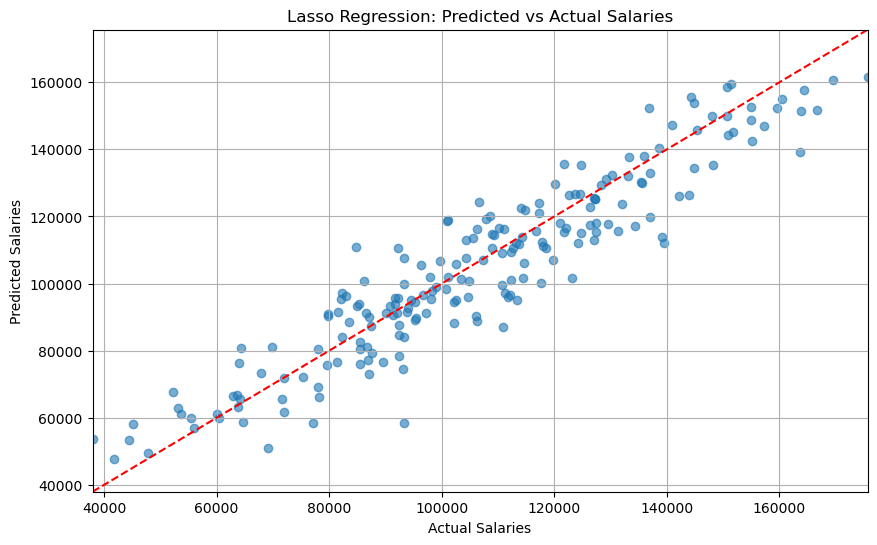

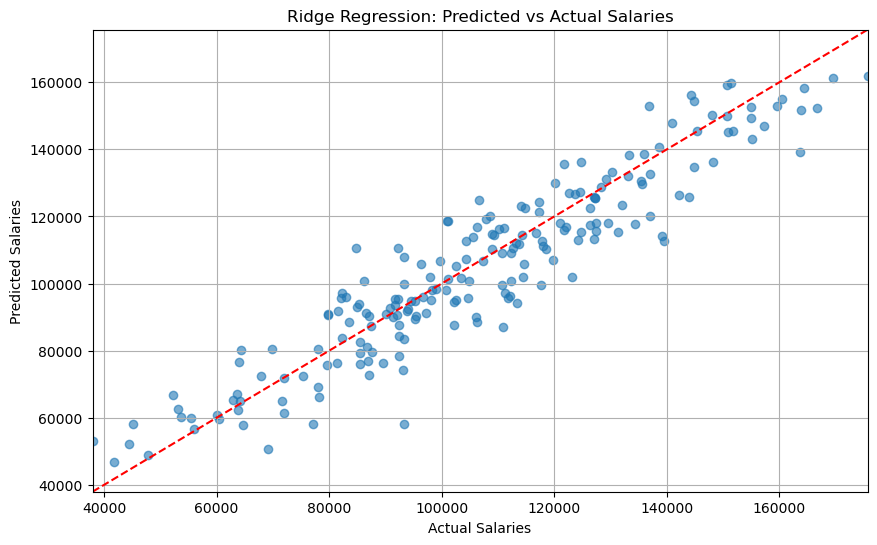

In [105]:
import matplotlib.pyplot as plt

# Function to plot predicted vs actual values
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # Diagonal line
    plt.title(f'{model_name}: Predicted vs Actual Salaries')
    plt.xlabel('Actual Salaries')
    plt.ylabel('Predicted Salaries')
    plt.xlim([y_true.min(), y_true.max()])
    plt.ylim([y_true.min(), y_true.max()])
    plt.grid()
    plt.show()

# Plot for Lasso
plot_predictions(y_test, predicted_salary_lasso_test, 'Lasso Regression')

# Plot for Ridge
plot_predictions(y_test, predicted_salary_ridge_test, 'Ridge Regression')

## Explanation of the Code

### Function `plot_predictions`:

- This function takes the actual (`y_true`) and predicted (`y_pred`) salary values along with the model name to create a scatter plot.
- A red dashed line represents the ideal case where predicted values equal actual values (y = x).

### Plotting:

- The function is called twice, once for the Lasso model and once for the Ridge model, using the corresponding predicted values.

### What to Look For:

- **Scatter Points**: If the points are close to the red dashed line, it indicates that the model's predictions are accurate.
- **Patterns**: If there is a pattern or clustering away from the line, it may indicate systematic errors in the predictions.

# Explanation of the Code to give the Prediction

## Creating a DataFrame
```python
df = pd.DataFrame(data)

Purpose: This line creates a Pandas DataFrame named df using the data dictionary.

Functionality: The DataFrame organizes the data in a tabular format, where each key in the dictionary becomes a column, and the values become the rows.

### DEFINING FEATURES AND TARGET VARIABLES

In [107]:
X = df.drop('Salary', axis=1)
y = df['Salary']

Features (X): The X variable contains all columns from the DataFrame except the 'Salary' column. This is done using the drop method, which removes the specified column (in this case, 'Salary').

Target Variable (y): The y variable is set to the 'Salary' column, representing the output we want to predict based on the features.

In [111]:
from sklearn.preprocessing import OneHotEncoder
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop first to avoid multicollinearity

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Education'] = le.fit_transform(X['Education'])  # Replace 'Education' with the relevant column

### SCALING THE FEATURES

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)  # Use the encoded dataset

StandardScaler: This creates an instance of the StandardScaler, which standardizes features by removing the mean and scaling to unit variance.

Fitting and Transforming: The fit_transform method is applied to X, which calculates the mean and standard deviation for scaling and then transforms the data accordingly. The resulting X_scaled will have a mean of 0 and a standard deviation of 1.

### TRAINING THE LINEAR REGRESSION MODEL

In [117]:
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

Model Initialization: An instance of LinearRegression is created and assigned to model.

Fitting the Model: The fit method is called with the scaled features (X_scaled) and the target variable (y). This trains the linear regression model based on the provided data.

### DEFINING THE PREDICTION FUNCTION AND COLLECTING USER INPUT

In [132]:
# Function to predict salary
# def predict_salary(model, scaler):
#     # Get user input
#     experience = float(input("Enter years of experience: "))
#     age = float(input("Enter age: "))
#     education = input("Enter education level (High School, Master, PhD): ")
#     job_title = input("Enter job title (Director, Manager, Engineer): ")
#     location = input("Enter location type (Urban, Suburban): ")
#     gender = input("Enter gender (Male, Female): ")

#     # Create a DataFrame with input values
#     input_data = pd.DataFrame({
#         'Experience': [experience],
#         'Age': [age],
#         'Education_High School': [1 if education == 'High School' else 0],
#         'Education_Master': [1 if education == 'Master' else 0],
#         'Education_PhD': [1 if education == 'PhD' else 0],
#         'Job_Title_Director': [1 if job_title == 'Director' else 0],
#         'Job_Title_Manager': [1 if job_title == 'Manager' else 0],
#         'Job_Title_Engineer': [1 if job_title == 'Engineer' else 0],
#         'Location_Urban': [1 if location == 'Urban' else 0],
#         'Location_Suburban': [1 if location == 'Suburban' else 0],
#         'Gender_Male': [1 if gender == 'Male' else 0],
#     })

#     # Scale the input data
#     input_data_scaled = scaler.transform(input_data)

#     # Predict salary
#     predicted_salary = model.predict(input_data_scaled)

#     # Print the predicted salary
#     print(f"Predicted Salary: ${predicted_salary[0]:,.2f}")

# # Call the function to make a prediction
# predict_salary(model, scaler)



def predict_salary(model, scaler):
    # Gather user input
    experience = float(input("Enter your years of experience: "))
    age = int(input("Enter your age: "))
    education = input("Enter your education level (High School, Bachelor's, Master's, PhD): ")
    location = input("Enter your location (Urban, Suburban, Rural): ")
    job_title = input("Enter your job title (Engineer, Manager, Director): ")
    gender = input("Enter your gender (Male/Female): ")
    
    # Prepare input data
    input_data = pd.DataFrame({
        'Experience': [experience],
        'Age': [age],
        'Education_High School': [1 if education == 'High School' else 0],
        'Education_Bachelor': [1 if education == "Bachelor's" else 0],
        'Education_Master': [1 if education == 'Master' else 0],
        'Education_PhD': [1 if education == 'PhD' else 0],
        'Location_Urban': [1 if location == 'Urban' else 0],
        'Location_Suburban': [1 if location == 'Suburban' else 0],
        'Location_Rural': [1 if location == 'Rural' else 0],
        'Job_Title_Engineer': [1 if job_title == 'Engineer' else 0],
        'Job_Title_Manager': [1 if job_title == 'Manager' else 0],
        'Job_Title_Director': [1 if job_title == 'Director' else 0],
        'Gender_Male': [1 if gender == 'Male' else 0],
        'Gender_Female': [1 if gender == 'Female' else 0],
    })

    # Make sure the input_data has all columns that were used during training
    missing_cols = set(scaler.feature_names_in_) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0  # Add missing columns with default value of 0
    
    # Reorder columns to match the scaler's fitted data
    input_data = input_data[scaler.feature_names_in_]
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)
    
    # Predict salary
    predicted_salary = model.predict(input_data_scaled)
    print(f"Predicted Salary: ${predicted_salary[0]:,.2f}")

# Call the function to make a prediction
predict_salary(model, scaler)

Enter your years of experience:  30
Enter your age:  20
Enter your education level (High School, Bachelor's, Master's, PhD):  High School
Enter your location (Urban, Suburban, Rural):  Urban
Enter your job title (Engineer, Manager, Director):  Manager
Enter your gender (Male/Female):  Male


Predicted Salary: $102,119.27


# Explanation of the `predict_salary` Function

## Purpose
This function is designed to predict a salary based on user input and a pre-trained machine learning model.

## Parameters
- **model**: The trained model used to make predictions.
- **scaler**: The scaler object that was used to standardize the training data.

## Collecting User Input
- **User Prompts**: These lines prompt the user to input various features required for salary prediction.
- **Data Types**:
  - `experience` and `age` are converted to `float` for numerical processing.
  - Other inputs (`education`, `job_title`, `location`, and `gender`) are collected as strings.

## DataFrame Creation
- A new DataFrame `input_data` is created using the user inputs.
- **One-Hot Encoding**:
  - Categorical variables are converted into binary format (0 or 1) using conditional statements.
  - Each category (education level, job title, location type, gender) is transformed into separate columns.

## Scaling the Input Data
- **Scaling**: The `transform` method of the `scaler` is applied to `input_data`, which scales the features in the same manner as the training data, ensuring consistency in the input format.

## Predicting Salary
- **Salary Prediction**: The `predict` method of the model is called with the scaled input data to generate the predicted salary.

## Output the Predicted Salary
- **Formatted Output**: This line formats and prints the predicted salary, displaying it with two decimal places and using commas as thousand separators.

## Calling the Prediction Function
- **Function Execution**: This line calls the `predict_salary` function, initiating the process of collecting user input and predicting the salary based on the provided model and scaler.
